<a href="https://colab.research.google.com/github/KsibiI/DM-ML---Assignment-1/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining and Machine Learning - Assignment 1

> Topics Covered: Data Cleaning, Exploratory Data Analysis, Visualization and Regression 1 and 2 (up to and including week 5)

**Due: Sunday November 7, 23.59pm**


This assignment is the opportunity to apply the different concepts seen in class so far to a new dataset on the sales of a store.

Run the first few cells to load the dataset and then get started with the questions! 

To complete the assignment you have to do ***both***:

1. Complete the exercises and submit [your Python notebook](https://moodle.unil.ch/mod/assign/view.php?id=841447)
2. Answer the questions to [the quiz on Moodle](https://moodle.unil.ch/mod/quiz/view.php?id=1172387) 
>Note: You can only complete the quiz one time. Have your notebook with the asnwers ready for answering the quiz. 

The answers to the quiz should be supported by your code in the notebook. If they are not, you will not receive points for them.

**IMPORTANT!** You can discuss the questions with other students but **do not exchange code!** This is individual work. We will run your code and check for similarities.

You can post your questions in slack [channel #assignments](https://app.slack.com/client/T02C4KVGVMX/C02BBA2TFQF).


If there is need for further clarifications on the questions, after the assignment is released, we will update the file on GitHub, so make sure you check the git repo of the class for updates.

Good luck!

In [ ]:
# Import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [ ]:
# Load the data
df=pd.read_csv('https://raw.githubusercontent.com/michalis0/DataMining_and_MachineLearning/master/data/sales.csv')

For the first part we use data on the retail sales of a store over several years. The dataset includes information on items purchased from this store, including for each item or article:
* order ID (a unique identifyier of the order through which this item was purchased)
* date of the order
* date the shipment was made
* mode of shipment used (first class, second class, etc.)
* customer ID (unique identifyier of the client)
* customer name
* client segment (consumer, corporate, etc.)
* country, city, state, postal code, region of the client
* product ID, product category, sub-category, and product name
* sales value for purchased items in USD.

## 1. Understand and Clean the Dataset

>1.1 Show the first 5 or 10 rows to get an idea of the data. 

In [ ]:
# YOUR CODE HERE
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
5,6,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
6,7,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800
7,8,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
8,9,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040
9,10,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000



### 1.2 Describe the dataset.

>1.2.1. How many observations(rows) and columns are in the dataset?

In [ ]:
# YOUR CODE HERE
df.shape

(9800, 18)

> 1.2.2. For which variable(s), if any, are there missing/null values?

In [ ]:
# YOUR CODE HERE
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [ ]:
df.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

>1.2.3. Which state generated the highest demand by *number* of items ordered over the entire period?

In [ ]:
# YOUR CODE HERE
df2=df.groupby("State", as_index=False)["Row ID"].count()
df2.head(5)
df2[df2['Row ID']==df2['Row ID'].max()]

,State,Row ID
3,California,1946


>... and which state generated the highest demand by total (aggregated) sales over the entire period?

In [ ]:
# YOUR CODE HERE
df3=df.groupby("State", as_index=False)["Sales"].sum()
df3.head(49)
df3[df3['Sales']==df3['Sales'].max()]

,State,Sales
3,California,446306.4635


>1.2.4. What percentage of technology items (Hint: look at Category) were shipped first class (Hint: look at Ship Mode)?

In [ ]:
# YOUR CODE HERE
dfCat=df.loc[df["Category"]=="Technology"]
dfNbRow=df.shape[0]
dfCatNbRow=dfCat.shape[0]
print(dfCatNbRow/dfNbRow * 100 , "%")

18.5 %


### 1.3. Data types and handling missing values

>1.3.1. List the different features and their data type. ¶


In [ ]:
# YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

>1.3.2. Are there any duplicated entries?

In [ ]:
# YOUR CODE HERE
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9795    False
9796    False
9797    False
9798    False
9799    False
Length: 9800, dtype: bool

In [ ]:
df.loc[df.duplicated()=='True', :]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


>1.3.3. Change the data type for the following columns: Order Date, Ship Date (from string to datetime), Ship Mode and Segment, from string to category. 

In [ ]:
# YOUR CODE HERE
df["Order Date"]  = pd.to_datetime(df["Order Date"], dayfirst=True)
df["Ship Date"]  = pd.to_datetime(df["Ship Date"], dayfirst=True)
for col in ['Ship Mode', 'Segment']:
   df[col] = df[col].astype('category')
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode              category
Customer ID              object
Customer Name            object
Segment                category
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object

>1.3.4. For which order period have these data samples been collected? (i.e, the oldest and the most recent order dates in the dataset)

In [ ]:
# YOUR CODE HERE
print(df['Order Date'].min(), df['Order Date'].max())

2015-01-03 00:00:00 2018-12-30 00:00:00


>1.3.5. For the postal code column, drop the missing values and set the data type to an integer and then to a string (make sure the final format of the ZIP code is of this kind: 42420 and not 42420.0).


In [ ]:
# YOUR CODE HERE
df.dropna(axis=0, inplace=True)
for col in ['Postal Code']:
   df[col] = df[col].astype('int64')
for col in ['Postal Code']:
   df[col] = df[col].astype('string')
df["Postal Code"].head()

0    42420
1    42420
2    90036
3    33311
4    33311
Name: Postal Code, dtype: string


## 2. Exploratory Data Analysis and Visualization

>2.1 Which are the top 5 dates on which the store reached the highest *value* of sales over the entire period included in the dataset?

In [ ]:
# YOUR CODE HERE
df4=df.groupby("Order Date", as_index=False)["Sales"].sum()
df4[df4['Sales']==df4['Sales']]
df41 = df4.sort_values(by='Sales', ascending=False)
df41.head(5)


,Order Date,Sales
53,2015-03-18,28106.716
824,2017-10-02,18452.972
1161,2018-10-22,15158.877
969,2018-03-23,14816.068
195,2015-09-08,14228.428


>2.2 How many unique customers did the shop have over this period?

In [ ]:
# YOUR CODE HERE
df5=df.groupby("Customer Name", as_index=False)["Row ID"].count()
df5.count()


Customer Name    793
Row ID           793
dtype: int64

>...Plot the top ten customers by total value of their orders in a horizontal bar chart.

In [ ]:
# YOUR CODE HERE
df6 = df.groupby("Customer Name", as_index=False)["Sales"].sum()
df10 = df6.sort_values(by='Sales', ascending=False)
dfTop10 = df10.head(10)
dfTop10.head(10)

,Customer Name,Sales
686,Sean Miller,25043.050
730,Tamara Chand,19052.218
622,Raymond Buch,15117.339
757,Tom Ashbrook,14595.620
6,Adrian Barton,14473.571
441,Ken Lonsdale,14175.229
671,Sanjit Chand,14142.334
334,Hunter Lopez,12873.298
672,Sanjit Engle,12209.438
156,Christopher Conant,12129.072


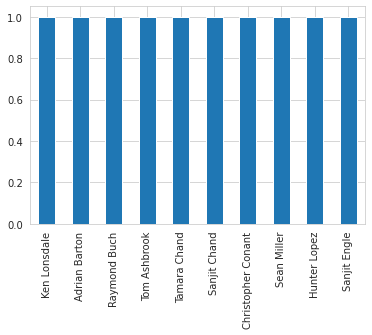

In [ ]:
dfTop10['Customer Name'].value_counts().plot(kind='bar')

>2.3. What are the most frequently bought product sub-categories ? 
>
> Hint: look at sub-category and count the times they appear in the dataset.

In [ ]:
# YOUR CODE HERE
dfSubCat = df.groupby("Sub-Category", as_index=False)["Row ID"].count()
dfSubCat[dfSubCat['Row ID']==dfSubCat['Row ID'].max()]

,Sub-Category,Row ID
3,Binders,1492


>...What are the product sub-categories that generated the highest value of sales over the entire period?
>
> Hint: aggregate sales by sub-category.

In [ ]:
# YOUR CODE HERE
dfSubCat1=df.groupby("Sub-Category", as_index=False)["Sales"].sum()
dfPhone=dfSubCat1[dfSubCat1['Sales']==dfSubCat1['Sales'].max()]
dfPhone


,Sub-Category,Sales
13,Phones,326487.698


>...What was the average purchase price of a phone sold by the store?

In [ ]:
# YOUR CODE HERE
dfSubCat2=df.groupby("Sub-Category", as_index=False)["Row ID"].count()
dfSubCat2


,Sub-Category,Row ID
0,Accessories,754
1,Appliances,458
2,Art,784
3,Binders,1492
4,Bookcases,225
5,Chairs,606
6,Copiers,66
7,Envelopes,247
8,Fasteners,214
9,Furnishings,931


>2.4 Create a new column storing the time difference between Ship Date and Order Date. What was the longest, shortest and the average delivery time difference?

In [ ]:
# YOUR CODE HERE
df['DiffDate'] = df['Ship Date'] - df['Order Date'] 
# The longest delivery time
df['DiffDate'][df['DiffDate']==df['DiffDate'].max()]

3      7 days
4      7 days
16     7 days
86     7 days
87     7 days
        ...  
9688   7 days
9689   7 days
9768   7 days
9773   7 days
9795   7 days
Name: DiffDate, Length: 615, dtype: timedelta64[ns]

In [ ]:
# The shortest delivery time
df['DiffDate'][df['DiffDate']==df['DiffDate'].min()]

366    0 days
367    0 days
368    0 days
369    0 days
657    0 days
        ...  
9697   0 days
9745   0 days
9746   0 days
9772   0 days
9786   0 days
Name: DiffDate, Length: 514, dtype: timedelta64[ns]

In [ ]:
# The average delivery time
df['DiffDate'].mean()

Timedelta('3 days 23:04:06.031259577')

> 2.5. How many orders (not items) had a delivery time of 6 or more days? 
>
> Hint: you may want to use [`pd.Timedelta()`](https://pandas.pydata.org/docs/reference/api/pandas.Timedelta.html).

In [ ]:
# YOUR CODE HERE 
for col in ['DiffDate']:
   df[col] = df[col].astype('timedelta64')
df['DiffDate']

ValueError: ignored

In [ ]:
df.loc[df["DiffDate"]>=6]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,DiffDate
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.592000e+14
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2.592000e+14
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,3.456000e+14
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,6.048000e+14
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,6.048000e+14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,6.048000e+14
9796,9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,4.320000e+14
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,4.320000e+14
9798,9799,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,4.320000e+14


>2.6. What are the average delivery times for each mode of shipment? Take the average over the total number of items ordered (not over the total number of orders).

In [ ]:
# YOUR CODE HERE
dfShipMode = df.groupby("Ship Mode", as_index=False)["DiffDate"].sum()
dfShipMode


,Ship Mode,DiffDate
0,First Class,3271 days
1,Same Day,24 days
2,Second Class,6178 days
3,Standard Class,29303 days


>2.7. Create a new column containing the year each order was placed (using Order Date). The plot the number of unique customers per year in a horizontal bar chart.

In [ ]:
# YOUR CODE HERE
df['Order Year'] = pd.DatetimeIndex(df['Order Date']).year
df['Order Year']


0       2017
1       2017
2       2017
3       2016
4       2016
        ... 
9795    2017
9796    2016
9797    2016
9798    2016
9799    2016
Name: Order Year, Length: 9789, dtype: int64

>2.8. Churn in 2018 as compared to 2017. Were there any customers in 2017 that the store lost in 2018? If so, how many?

In [ ]:
# YOUR CODE HERE


>2.9. Generate a table with the average sales by customer segment and by year (take the simple average over the number of items sold). Plot in a line chart the average sales by customer segement over time, with the years on x-axis, the average sales on the y-axis, and a line for each segment.

In [ ]:
# YOUR CODE HERE


>2.10. Using `folium`, plot on a map the location of a subset of customers defined below, using circle markers proportionate to the value of their aggregate purchases.
>
> Only include 2018 data for corporate customers with per item purchases above USD 100. 
>
>A separate database with latitude and longitude measures for US zip codes is provided below. Merge the latitude and longitude with your transactions dataset. Make sure to drop any missing values before plotting your map.

In [ ]:
# import required packages
import folium

In [ ]:
# import latitude and longitude data
latlong=pd.read_csv('https://gist.githubusercontent.com/erichurst/7882666/raw/5bdc46db47d9515269ab12ed6fb2850377fd869e/US%2520Zip%2520Codes%2520from%25202013%2520Government%2520Data', 
                    dtype={'ZIP': 'str'})
latlong.head()

,ZIP,LAT,LNG
0,00601,18.180555,-66.749961
1,00602,18.361945,-67.175597
2,00603,18.455183,-67.119887
3,00606,18.158345,-66.932911
4,00610,18.295366,-67.125135


In [ ]:
# YOUR CODE HERE FOR SELECTING THE SUBSET


In [ ]:
# YOUR CODE HERE FOR MERGING THE SUBSET WITH THE LATITUDE AND LONGITUDE DATA


In [ ]:
# YOUR CODE HERE FOR GENERATING THE MAP


## 3. Regression Analysis

For this section please work on data aggregated by daily sales in USD. Here we are providing the dataframe for you. The regression dataset contains observations on sales aggregated by day, including:
* the date of the orders
* the number of orders received on that day
* the number of items ordered on that day
* the number of customer segments represented in the orders for that day
* the number of product sub-categories included
* the aggregated value of daily sales in USD
* the year, the month, and the day of the transactions stored separately.

>Load the data.

In [ ]:
#Upload the data
new_data=pd.read_csv('https://raw.githubusercontent.com/michalis0/DataMining_and_MachineLearning/master/data/regression_sales.csv')
new_data.head()

,Order Date,number_orders,number_items,number_segments,number_subcategory,sales_per_day,year,month,day,log_sales
0,03/01/2015,1,1,1,1,16.448,2015,1,3,2.800204
1,04/01/2015,1,3,1,3,288.060,2015,1,4,5.663169
2,05/01/2015,1,1,1,1,19.536,2015,1,5,2.972259
3,06/01/2015,3,9,3,6,4407.100,2015,1,6,8.390972
4,07/01/2015,1,2,1,2,87.158,2015,1,7,4.467723


>3.1.1. Generate descriptive statistics

In [ ]:
# YOUR CODE HERE
new_data.describe()

,number_orders,number_items,number_segments,number_subcategory,sales_per_day,year,month,day,log_sales
count,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000
mean,4.000000,7.965012,2.004068,5.266884,1832.878285,2016.536208,6.787632,15.794142,6.714374
std,2.799197,6.152745,0.770475,3.016305,2283.923773,1.124801,3.410032,8.781964,1.525230
min,1.000000,1.000000,1.000000,1.000000,2.025000,2015.000000,1.000000,1.000000,0.705570
25%,2.000000,3.000000,1.000000,3.000000,377.736000,2016.000000,4.000000,8.000000,5.934196
50%,3.000000,6.000000,2.000000,5.000000,1053.614000,2017.000000,7.000000,16.000000,6.959981
75%,5.000000,11.000000,3.000000,7.000000,2379.994000,2018.000000,10.000000,23.000000,7.774853
max,19.000000,38.000000,3.000000,14.000000,28106.716000,2018.000000,12.000000,31.000000,10.243764


>3.1.2. Plot the distribution of sales per day, using bins=50. Then create a new column equal to the natural logarithm of sales per day and plot its histogram as well.

In [ ]:
# YOUR CODE HERE


>3.1.3. Create a pairplot with the log of sales per day on the horizontal axis and on the vertical axis the number of items ordered and number of orders.

In [ ]:
# YOUR CODE HERE


## Simple Linear Regression

>3.2 Regress log of sales on number of orders, number of items, number of segments, year, month and day.
>
>3.2.1. Select the dependent (y) and the independent variables (X).

In [ ]:
new_data.columns

Index(['Order Date', 'number_orders', 'number_items', 'number_segments',
       'number_subcategory', 'sales_per_day', 'year', 'month', 'day',
       'log_sales'],
      dtype='object')

In [ ]:
# YOUR CODE HERE
y = np.array(new_data["log_sales"])
X = np.array(new_data["number_items"])
X.shape, y.shape

((1229,), (1229,))

>3.2.2 Split your dataset into a training set (80%) and a test set (20%). Use sklearn.model_selection.train_test_split() and set the **random_state to 77.**

AttributeError: ignored

In [ ]:
# YOUR CODE HERE
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
sns.set_style("white")
from sklearn.linear_model import LinearRegression
LR = LinearRegression(fit_intercept=True)
LR.fit(X, y)

ValueError: ignored

>3.2.3 Train a linear regression model on the training data. What is the R^2 score for the test data?

In [ ]:
# YOUR CODE HERE


>3.2.4. Predict what would be the total value of sales in USD on 15 January 2019 assuming there were 3 orders received on that day, including 9 items, from 3 segments.

In [ ]:
# YOUR CODE HERE


## Linear Regression with Standardization

> 3.2.5. Apply a standard scaler to the following columns: number_orders, number_items, number_segments. 
> 
> Hint: use the scaler on the already split data. Fit-transform the scaler on X_train and apply transform on X_test.

In [ ]:
# YOUR CODE HERE


> 3.2.6. Train a linear regression model with the standardised data. What is the R^2 score for the test data?

In [ ]:
# YOUR CODE HERE


> 3.2.7. Predict what would be the total number of sales in USD on 15 January 2019 assuming 3 orders received on that day, including 9 items, from 3 segments

In [ ]:
# YOUR CODE HERE


>3.2.8. Looking at the coefficients from the linear regression with standardization, identify which variable is the most significant in this model. 

In [ ]:
# YOUR CODE HERE

> 3.2.9. Calculate the adjusted R-squared and identify the optimum regression coefficients using linear regression with standardisation. 
>
> Hint: calculate the adjusted R-squared for the full model with linear regression and standardisation (as above). The try dropping either one of the columns: 'number_orders', 'number_items', 'number_segments' and recalculate adjusted R-squared for every new model. Identify which combination of features gives the highest adjusted R-squared. 
>
>Check out this documentation file on the [adjusted R-squared](https://www.statology.org/adjusted-r-squared-in-python/).

In [ ]:
# YOUR CODE HERE


Train the model when you drop `number_segments` and calculate the adjusted R-squared.

In [ ]:
# YOUR CODE HERE


Train the model when you drop `number_items` and calculate the adjusted R-squared.

In [ ]:
# YOUR CODE HERE


Train the model when you drop `number_orders` and calculate the adjusted R-squared.

In [ ]:
# YOUR CODE HERE
